<a href="https://colab.research.google.com/github/RodYazdan/CODING-DOJO-Machine-Learning/blob/master/Hirad_Yazdankhah_Project2_Resubmission_Part_3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project2- Part 1 2 &3 ( SEE  BELOW FOR PART 3)
#Hirad Yazdankhah
#July 22 2022

# 0- Import Library and Data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
#import seaborn to make a nice heatmap for our confusion matrix
import seaborn as sns

#import some necessary tools
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#import accuracy, precision, recall, classification report, and confusion matrix scoring functions
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay

#Importing the Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier

#Importing Evaluation Models
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# For scaling data
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# For Clustering
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import make_circles

# PENGUIN CLASSIFICATION DATA SET=========

In [2]:
#Load the Data
filename1 = '/content/penguins_size.csv'
df1 = pd.read_csv(filename1)
df1.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
df1['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

##1-Delete unnecessary columns 

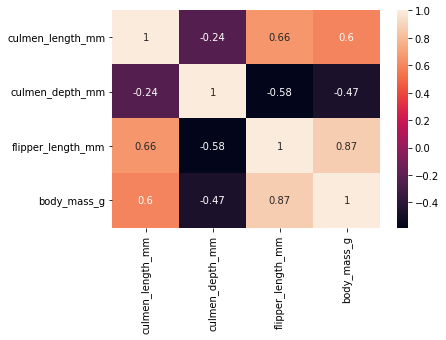

In [5]:
# We look at the relationsip between the variables
corr = df1.corr()
sns.heatmap(corr, annot= True)
# we see that there is a high correlation between all the column values so I am not going to delete any columns

##2-Delete duplicate rows

In [6]:
# shows number of duplicated data
df1.duplicated().sum()
# There are no duplicates.
#
# If there were diplicates we woudl have dropped them with the command below :
#df1 .drop_duplicates(inplace=True)

0

##3-Identify and address missing values 

In [7]:
# Identify Missing Values
df1.isna().sum()
# note all columns except for species and islnd have 2 missing values
# Note that all the coumns with missing values have numerical values that can be replaced with mean or median
# I have chosen medin value to replace the missing values since it is the average  f the data set for the numerical 
 

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [8]:
df1['culmen_length_mm'].fillna(value=df1['culmen_length_mm'].mean(),inplace=True)
df1['culmen_depth_mm'].fillna(value=df1['culmen_depth_mm'].mean(),inplace=True)
df1['flipper_length_mm'].fillna(value=df1['flipper_length_mm'].mean(),inplace=True)
df1['body_mass_g'].fillna(value=df1['body_mass_g'].mean(),inplace=True)
df1['sex'].fillna(value=df1['sex'].mode()[0],inplace=True)
# Confirm there are no Missing Values
df1.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

###4-Identify and correct inconsistencies in data for categorical values (i.e. Cat, cat, cats)

In [9]:
# df1['sex'].mode()
df1['sex'].value_counts()
# notice we have about the same number of M and F values . However since we have more M I go with the the mode that gets the most frequent occurance

MALE      178
FEMALE    165
.           1
Name: sex, dtype: int64

In [10]:
# also we replace the value (.) with M and check 
df1['sex'] = df1['sex'].replace('.','MALE')
df1['sex'].value_counts()

MALE      179
FEMALE    165
Name: sex, dtype: int64

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   344 non-null    float64
 3   culmen_depth_mm    344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [12]:
df1['species'].value_counts()
# Note : Values are consistent

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [13]:
df1['island'].value_counts()
# Note : Values are consistent

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

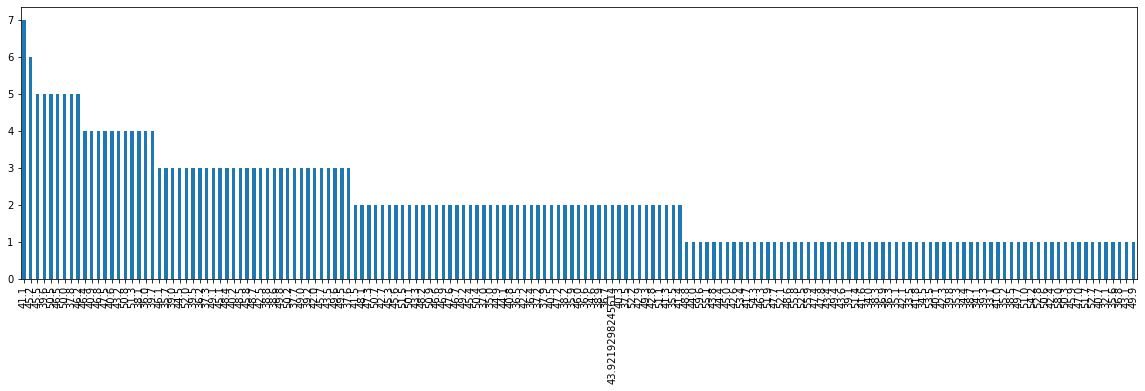

In [14]:
plt.figure(figsize=(20, 5))
df1['culmen_length_mm'].value_counts().plot(kind='bar')
# Note : Values are consistent

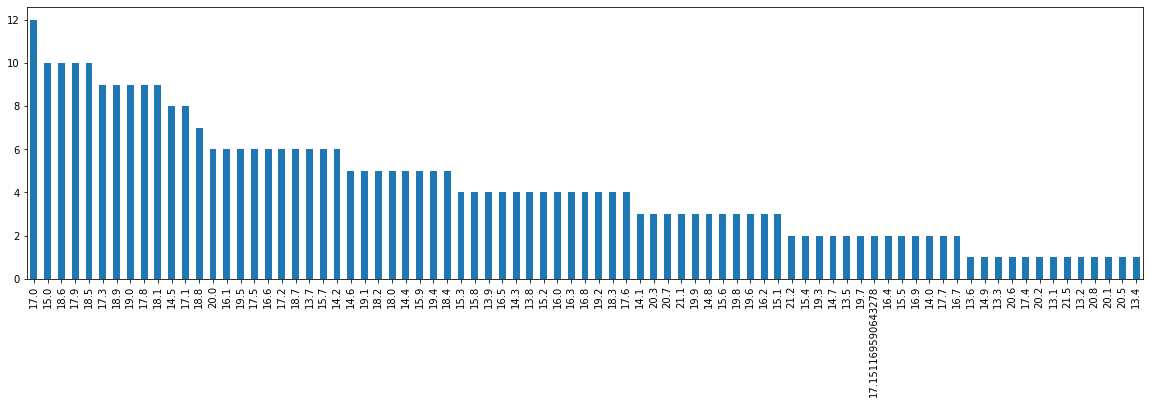

In [15]:
plt.figure(figsize=(20, 5))
df1['culmen_depth_mm'].value_counts().plot(kind='bar')
# Note : Values are consistent

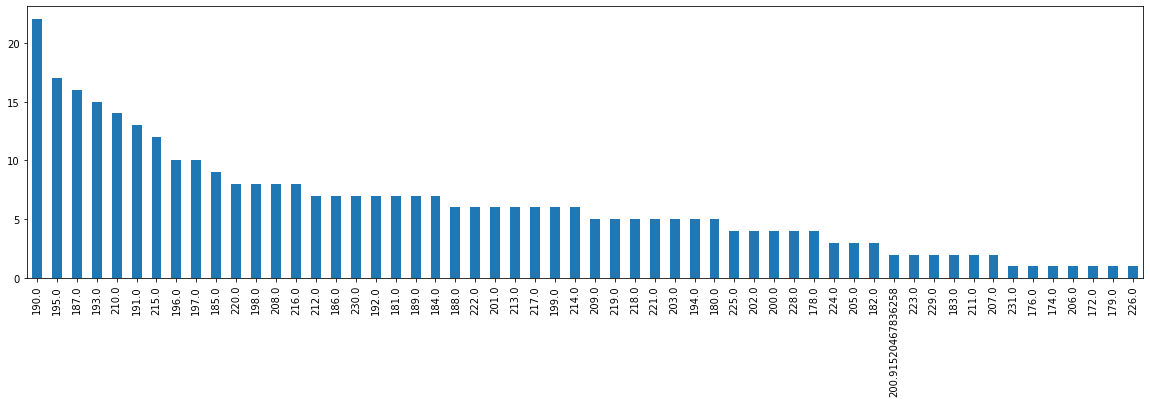

In [16]:
plt.figure(figsize=(20, 5))
df1['flipper_length_mm'].value_counts().plot(kind='bar')
# Note : Values are consistent

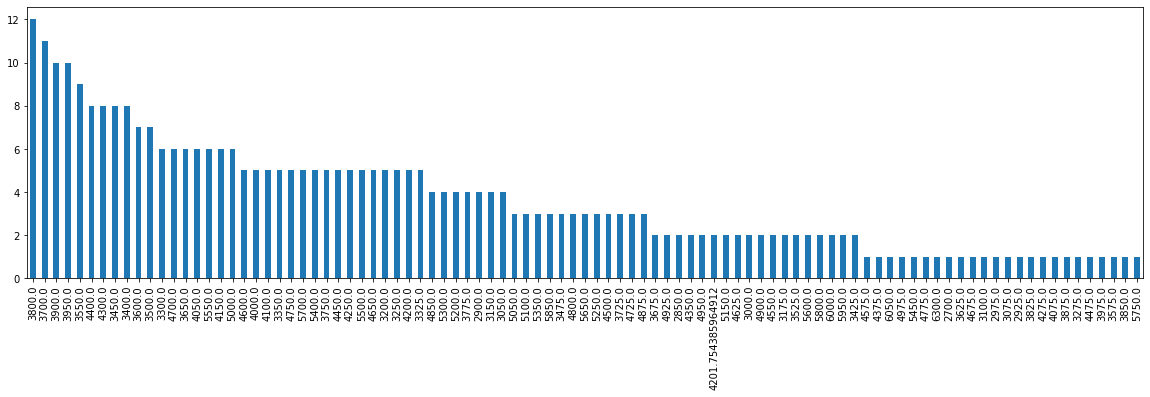

In [17]:
plt.figure(figsize=(20, 5))
df1['body_mass_g'].value_counts().plot(kind='bar')
# Note : Values are consistent

##5-Produce univariate visuals for the target and all features

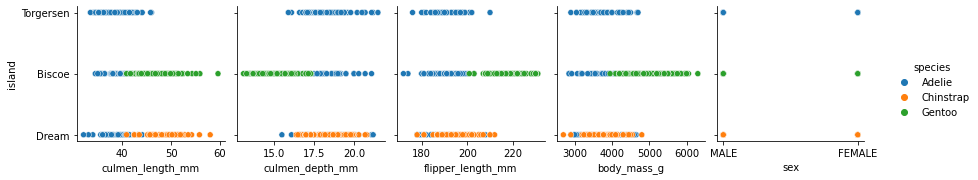

In [18]:
# we get a scatterplot between all of our features and the target 
sns.pairplot(df1,
             
             x_vars = ['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g','sex'],
             y_vars = ['island'],
             hue ='species'
             );

###6-Identify outliers 

In [19]:
df1.describe ()
# note that when we look at the mean of each cokumn and compare it to the max and min values the values look reasonalble
# thus I do not think there are any any outliers 

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,344.000000,344.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.443643,1.969027,14.020657,799.613058
min,32.100000,13.100000,172.000000,2700.000000
25%,39.275000,15.600000,190.000000,3550.000000
50%,44.250000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


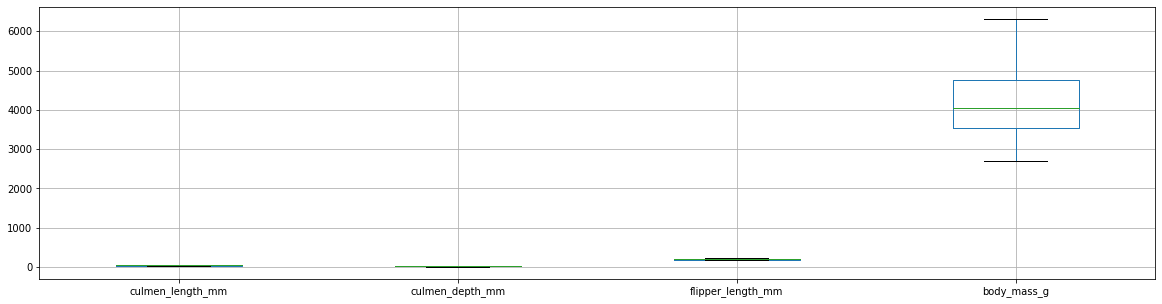

In [20]:
plt.figure(figsize=(20, 5))
df1.boxplot()

##################################################################
#PART 3
##################################################################

#Identify any moderate or strong correlations between your target and your features and/or between one feature and another

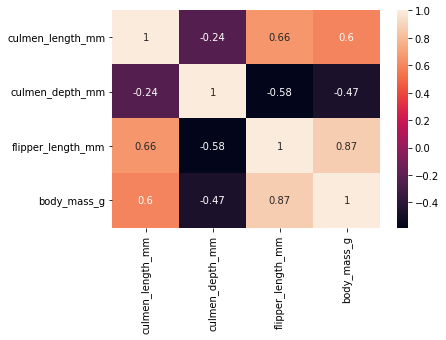

In [21]:
# We look at the relationsip between the variables
corr = df1.corr()
sns.heatmap(corr, annot= True)
# we see that there is a high correlation between all the column values

# Creating multivariate exploratory visuals to further understand your data

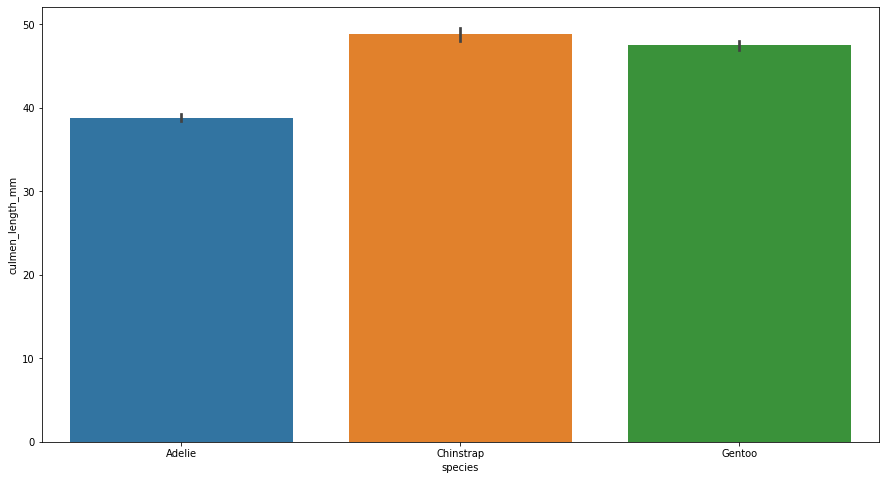

In [22]:
plt.figure(figsize = (15,8))
sns.barplot(data=df1, x='species', y='culmen_length_mm')

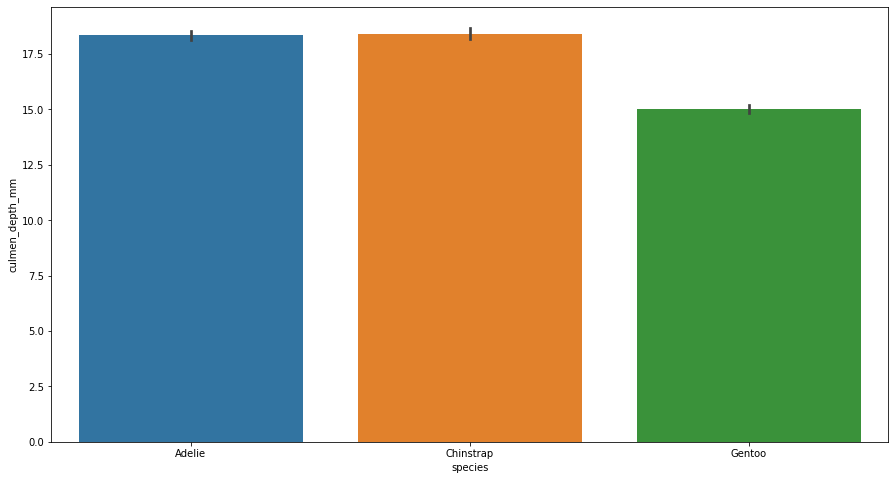

In [23]:
plt.figure(figsize = (15,8))
sns.barplot(data=df1, x='species', y='culmen_depth_mm')

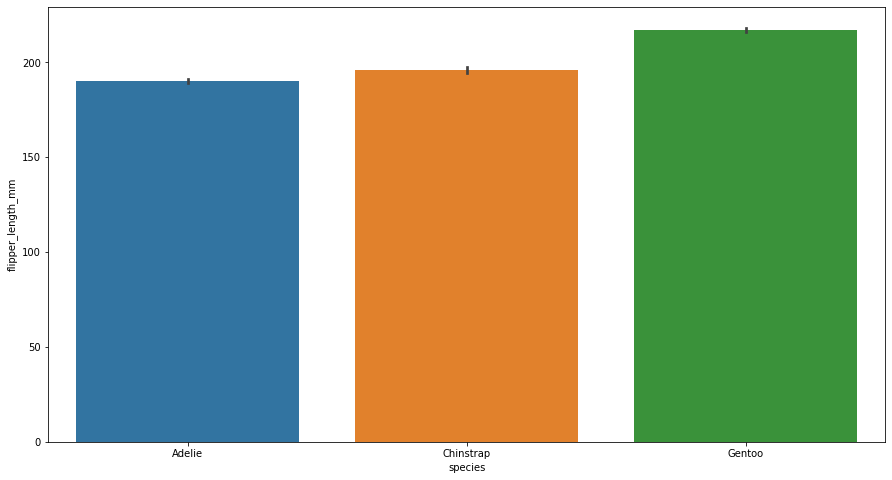

In [24]:
plt.figure(figsize = (15,8))
sns.barplot(data=df1, x='species', y='flipper_length_mm')

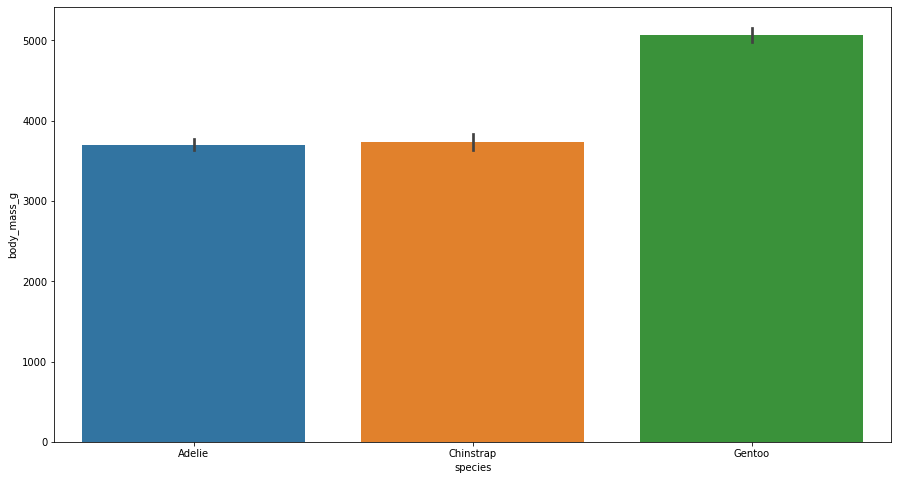

In [25]:
plt.figure(figsize = (15,8))
sns.barplot(data=df1, x='species', y='body_mass_g')

#From your data analysis, create two visuals that demonstrate key findings of interest to a stakeholder. These visuals should be reporting quality.  Be sure to explain the finding associated with each visual.  (NO histograms, boxplots, or correlation plots)

Text(0.5, 1.0, 'Penguin Body Mass vs Type')

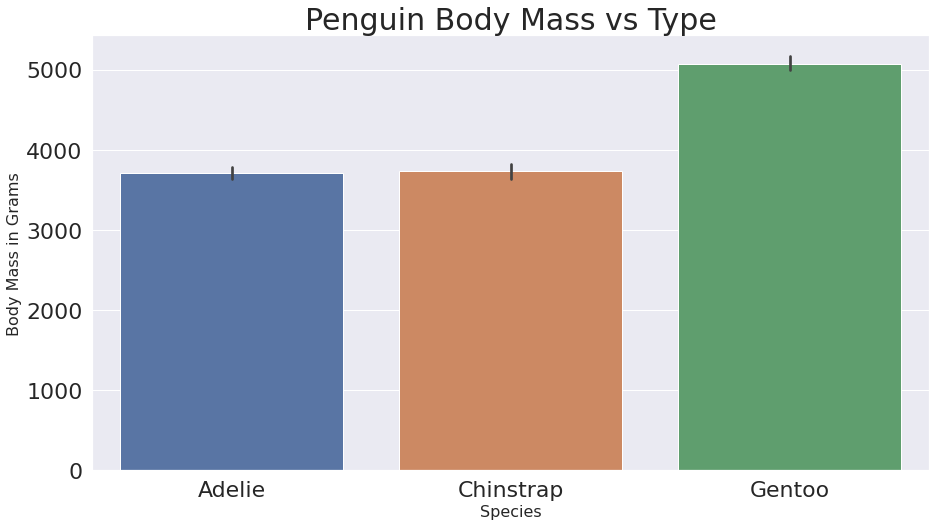

In [37]:
plt.figure(figsize = (15,8))
sns.set(font_scale=2)
sns.barplot(data=df1, x='species', y='body_mass_g').set(title='Penguin Body Mass vs Type')
#modify individual font size of elements
#plt.legend(title='Company', fontsize=20)
plt.xlabel('Species', fontsize=16);
plt.ylabel('Body Mass in Grams', fontsize=16);
plt.title('Penguin Body Mass vs Type', fontsize=30)

Note that the graph above shows that one can recognize the Gento specy easily from the body mass since it is much higher ( over 1000 grams) than the other two species . Even considering the standard deviation which is much lower than the difference between the body mass of Gentoo and the other species.

Text(0.5, 1.0, 'Penguin Culmen Length vs Type')

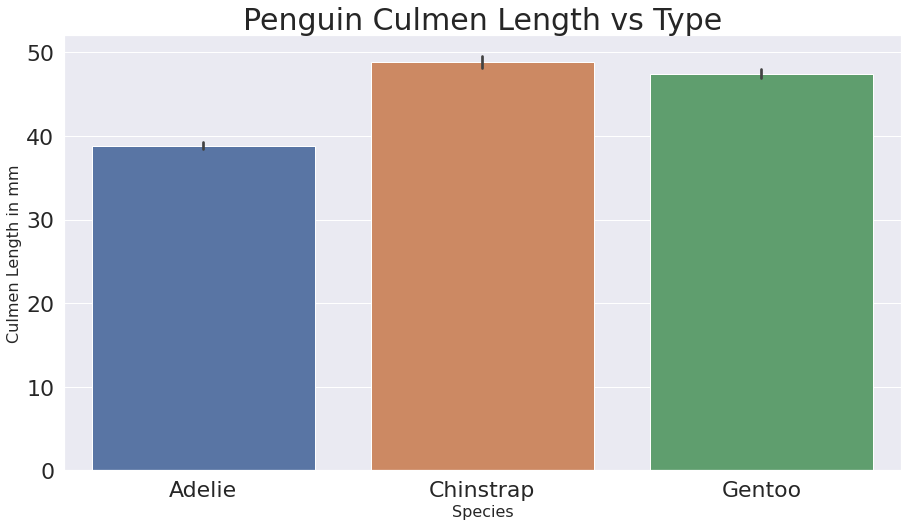

In [38]:
plt.figure(figsize = (15,8))
sns.barplot(data=df1, x='species', y='culmen_length_mm')
#modify individual font size of elements
#plt.legend(title='Company', fontsize=20)
plt.xlabel('Species', fontsize=16);
plt.ylabel('Culmen Length in mm', fontsize=16);
plt.title('Penguin Culmen Length vs Type', fontsize=30)

Note the above graph shows that the Adelie specy can be identified from it's Culmen length which is much smaller than the other twp penguin species. THe standard deviation is also rather small compared to the differnce between the Adelie Culmen Length and the others which is about 10 mm.